In [426]:
'''This data set is collected from car sales which includes data such as The Make, Model, 
how many sales in thousands that car has made throughout the year, Engine size, and other factors 
relating to the car. From this data set, I wanted to see how these factors relate to how many sales the car 
has made throughout the year. The benefit of looking for this is to understand the reasoning 
behind why customers buy these cars.'''

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd 
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


df = pd.read_csv("Car_sales.csv")
data = df.copy()
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [427]:
#Create a dataframe for all of the informaiton regarding money allong with vehicle type
df1 = pd.DataFrame(data, columns = ['Manufacturer','Vehicle_type', 'Sales_in_thousands', 'Price_in_thousands'])


In [428]:
#Create a dataframe for all of the informaiton regarding money
df2 = pd.DataFrame(data, columns = ['Model', 'Sales_in_thousands', 'Price_in_thousands'])


In [429]:
#Create a dataframe for all of the informaiton regarding performance
df3 = pd.DataFrame(data, columns = ['Manufacturer', 'Model', 'Horsepower', 'Fuel_efficiency', 'Power_perf_factor'])
 

In [430]:
#Outer Merge dataframes 2 and 3 in order to merge with the manufacturer later 
df4 = pd.merge(df2,df3, on = 'Model', how = "outer")


In [431]:
#Outer Merge dataframes 1 and 4 in order to merge with manufacturer
df5 = pd.merge(df1,df4, on = 'Manufacturer', how = "outer")


In [432]:
# Here we are grouping the mean price of each manufacturer by getting the mean of each model 
# It takes the price_in_thousands for each model of car under that manufacturer and gets the mean, 
# grouping it by manufacturer
mpm = df1[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer',
as_index = False).mean()


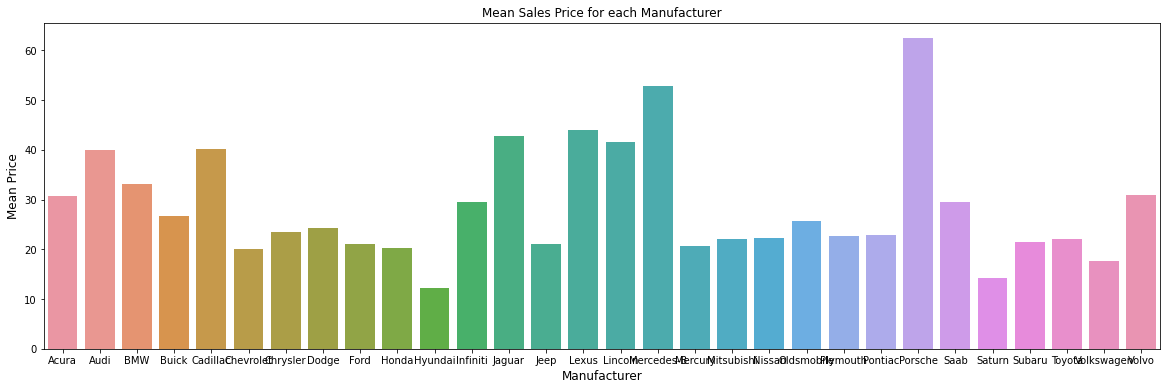

In [433]:
#Mean Price per each Manufacturer
plt.figure(figsize = (20, 6)) #make the bar plot a decent size
sns.barplot(x = mpm['Manufacturer'], y = mpm['Price_in_thousands']) #set the x and y variables 
plt.title('Mean Sales Price for each Manufacturer') #create a title
plt.ylabel('Mean Price', fontsize = 12) # set the x lable
plt.xlabel('Manufacturer', fontsize = 12) #set the y leble
plt.show()

In [434]:
'''During my research, I found that Porsche had the highest mean sales price, but the lowest 
percentage of cars sold, While Ford was the number one leader in car sales with 24% followed 
by dodge, Toyota then Honda.'''

#This pie chart shows the percentage of sales each Manufacturer has amongst each other

#Takes in the values from Sales in thousands, sets the lables as names and adds the percentage of sales to the lables
fig = px.pie(df4, values='Sales_in_thousands', names='Manufacturer', title = 'Sales Percentage by Manufacturer')
fig.update_traces(textposition='inside', textinfo='percent+label') #text position is set to inside rather than outside

#positions the title 
fig.update_layout(
    title={'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [435]:
'''I wanted to know why Porsche had such a low sales margin, so I decided to see how horsepower
relates to the sale of all cars. I found out that the majority of cars bought ranged between
119 and 230 horsepower. This means that the majority of people do not really care about horsepower
when buying a car.'''

#Correlation between Horsepower and Sales

#Set the x and y, hover data: when mouse hovers over, it shows sales in thousands, Horsepower and Model
fig = px.scatter(df4, x = 'Horsepower', y = 'Sales_in_thousands', color = 'Model',
                 hover_data=['Sales_in_thousands'],title='HorsePower vs. Sales in Thousands')
fig.update_traces(marker_size=5)

#positions the title 
fig.update_layout(
    title={'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [436]:
'''. Next, to see if this theory is valid, I decided to check out the power-to-performance ratio
and had basically the same results.  '''

#Correlation between power performance and sales

#Set the x and y, hover data: when mouse hovers over, it shows sales in thousands, power to performance ratio and Model
fig = px.scatter(df4,x='Power_perf_factor', y = 'Sales_in_thousands', color = 'Model',
    hover_data=['Sales_in_thousands'],title='Power Performance vs. Sales in Thousands')
fig.update_traces(marker_size=5)

#positions the title 
fig.update_layout(
    title={'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [437]:
'''When we look at Fuel Economy, we can see that the data is beginning to spread out horizontally, 
and staying pretty stagnant with the sales. Most cars sold were in the range of 17 and 27 miles 
per gallon which means Fuel economy definitely plays a factor in these purchases. '''

#Correlation between Fuel Efficiency and sales

#Set the x and y, hover data: when mouse hovers over, it shows sales in thousands, Fuel efficiency and Model
fig = px.scatter(df4,x='Fuel_efficiency', y = 'Sales_in_thousands', color = 'Model',
    hover_data=['Sales_in_thousands'],title='Fuel Efficiency vs. Sales in Thousands')
fig.update_traces(marker_size=5)

#positions the title 
fig.update_layout(
    title={'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [438]:
mpm2 = df1[['Vehicle_type', 'Sales_in_thousands']].groupby('Vehicle_type',
as_index = False).mean()


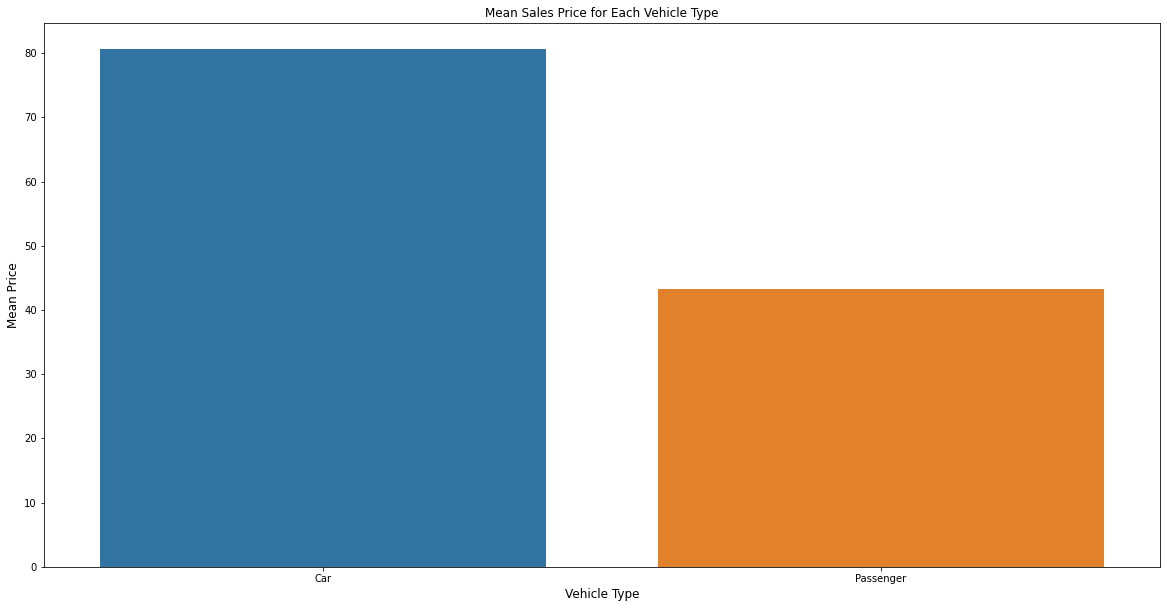

In [439]:
'''So, Passenger vehicles are vehicles that are made to carry people such as SUVs minivans, 
and anything which fits that criterion. With that being said, almost half of the population 
did not buy a vehicle due to it being classified as a passenger vehicle.'''

plt.figure(figsize = (20, 10)) #set the size of the bar graph to a decent size
sns.barplot(x = mpm2['Vehicle_type'], y = mpm2['Sales_in_thousands']) #set the x and y values
plt.title('Mean Sales Price for Each Vehicle Type') #create a title
plt.ylabel('Mean Price', fontsize = 12) #create a y lable
plt.xlabel('Vehicle Type', fontsize = 12) #create a x lable
plt.show()

In [440]:
'''I decided to go with a decision tree and a Random Forrest regression. A random tree 
builds decision trees on different samples and takes the majority vote for classification 
and average in case of regression. In order to create the Random Forrest, I had to go 
through multiple steps. Some of the columns in the data had values that were not comprehensible
to machine learning platforms such as null values, strings, and dates. I first created a list
of data which did not have any nulls. I then went through the collumns with missing values and added
each null with a median of the colum’s data. This accounts for the columns year release value, fuel
efficiency, and curb weight. I then dropped the model column and only accounted for the brand of the car.'''


modified_data = data[data['Price_in_thousands'].notna()]
modified_data.isnull().sum().sort_values(ascending = False)

#Replacing the missing values in __year_resale_value as median
year_index = list(~modified_data['__year_resale_value'].isnull())
median_year = np.median(modified_data['__year_resale_value'].loc[year_index])

#Replacing the missing values of __year_resale_value 
modified_data['__year_resale_value'].fillna(median_year, inplace = True)







# Replacing the missing values in Fuel_efficiency as median
fuel_index = list(~modified_data['Fuel_efficiency'].isnull())
median_fuel = np.median(modified_data['Fuel_efficiency'].loc[fuel_index])

# Replacing the missing values of Fuel_efficiency 
modified_data['Fuel_efficiency'].fillna(median_year, inplace = True)






#Replacing the missing values in Curb_weight as median
c_index = list(~modified_data['Curb_weight'].isnull())
median_c = np.median(modified_data['Curb_weight'].loc[c_index])

# Replacing the missing values of Curb_weight
modified_data['Curb_weight'].fillna(median_c, inplace = True)





#Dropping Model
modified_data.drop(['Model'], axis = 1, inplace = True)

In [441]:
'''I then needed to create 2 separate classifications for the Brand of the car. 
Class 1 is cars that are $30,000 or less and class 2 is cars with a higher price. 
Now that the manufacturer column is not a string, the machine learning model would be 
able to comprehend that column. Next we move on to create a new column for Age which will 
replace the year the car launched. We do this because the model can not read back slashes, 
so we remove the whole date and only use the year the car was made in as the year column'''



#Seperating the Manufacturers into class 1 and class 2 to have them as yes and no 
class1 = []
class2 = []

for index in range(len(mean_price_manufacturer)):
    if mean_price_manufacturer.iloc[index, 1] <= 30:
        class1.append(mean_price_manufacturer.iloc[index, 0])
    else:
        class2.append(mean_price_manufacturer.iloc[index, 0])
        
# Modifying Manufacturer 
manufacturer_data = modified_data['Manufacturer']
new_manufacturer_data = []

for val in manufacturer_data:
    if val in class1:
        new_manufacturer_data.append(1)
    else:
        new_manufacturer_data.append(2)
        
modified_data['Manufacturer'] = new_manufacturer_data

# Creating Age so that there is no Date time stamp
age_data = []
launch_data = modified_data['Latest_Launch']

#Splits the numbers by '/', appends 2022 as the year
for val in launch_data:
    year = int(val.split('/')[-1])
    age_data.append(2022 - year)
    
#Adding Age as a column 
modified_data['Age'] = age_data

#Dropping Latest_Launch for no time stamp
modified_data.drop(['Latest_Launch'], axis = 1, inplace = True)

In [452]:
'''I created a function that would go through each of the columns which were all originally
numerical in value and would normalize the dataset in each one of those columns. The next step
was to create dummy variables for the manufacturer and vehicle type columns from the modified dataset. 
This sets them to either a 0 or a 1. I then created a target for the learning model which was
the sales in thousands, and dropped it from the modified data set.
'''


def normal(datafm, col):
    data = datafm[col]
    mn = min(data)
    mx = max(data)
    new_data = []
    
    for val in data:
        new_data.append((val - mn)/(mx - mn))
    
    datafm[col] = new_data

num_col = ['Price_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width','Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor', 'Age']
for i in num_col:
    normal(modified_data, i)
    
#Encoding Manufacturer, Vehicle_type of the modified dataset
enc_dataset = pd.get_dummies(data = modified_data, columns = ['Manufacturer', 'Vehicle_type'])

#Create target for Sales_in_thousands
target_data = enc_dataset['Sales_in_thousands']
enc_dataset['Target'] = target_data

# Drop Sales_in_thousands
enc_dataset.drop(['Sales_in_thousands'], axis = 1, inplace = True)



In [453]:
'''The next step was to create the x and y variables and the train and test with a 20: 80 ratio.
I also created a dictionary to keep RMSE and r squared. Now we move on to the decision tree.
I create an instance of the decision tree regressor and fit it with our x and y train. 
I then call it to predict the x-test. I have it calculate MSE, then RMSE, and from that, 
it can get the r-squared value. I save the values of each into their dictionary and print them out.
I do the exact same thing for the random forest which has 100 bins and gets the results. For the Decision tree, 
R-Squared is at -.249 For the Random Forrest, the R-Squared is at .391. Values between .2 and .5 
are considered to be accurately predicted data. This means that from the two machine learning models the Random 
Forest was more accurate in concluding the data. I recommend creating more machine-learning models in the future 
to have an even better understanding of which model can predict how many sales of these cars there will be
in the next coming year.'''


#split the dataset into X and Y
X = enc_dataset.iloc[:, : -1].values
Y = enc_dataset.iloc[:, -1].values

# train and test with 80, 20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, shuffle = True)

#Dictionary to keep rmse
model_rmse = OrderedDict()

# Dictionary to keep rsquared
model_r2 = OrderedDict()





# Training the decision tree 
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

# Predicting results
Y_pred = decision_tree_regressor.predict(X_test)

# Calculating RMSE and rsquared
mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Decision Tree Regression'] = rmse
model_r2['Decision Tree Regression'] = r2_value

print('RMSE of the Decision Tree is : {}'.format(rmse))
print('R-squared of the Decision Tree is : {}'.format(r2_value))
print(' ')





# Training the random forest 
random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

# Predicting results
Y_pred = random_forest_regressor.predict(X_test)

# Calculating RMSE and rsquared 
mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (100 trees)'] = rmse
model_r2['Random Forest Regression (100 trees)'] = r2_value

print('RMSE of the Random Forrest is : {}'.format(rmse))
print('R-squared of the Random Forrest is : {}'.format(r2_value))

RMSE of the Decision Tree is : 0.126
R-squared of the Decision Tree is : -0.249
 
RMSE of the Random Forrest is : 0.089
R-squared of the Random Forrest is : 0.391
